In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [21]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [25]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [26]:
df.drop(columns=['RowNumber', 'Surname', 'CustomerId'], inplace=True)

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encode the Categorical Data

In [28]:
import pandas as pd
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

Now split the data into train and test set

In [29]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [31]:
X_train.shape, y_train.shape #training set

((8000, 11), (8000,))

In [32]:
X_test.shape, y_test.shape #testing set

((2000, 11), (2000,))

Scaling / Normalizing the features

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# import tensorflow
# from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [36]:
model = Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4659 - loss: 0.7859 - val_accuracy: 0.7987 - val_loss: 0.5106
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.5064 - val_accuracy: 0.7994 - val_loss: 0.4591
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4686 - val_accuracy: 0.8075 - val_loss: 0.4381
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4531 - val_accuracy: 0.8150 - val_loss: 0.4325
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.4305 - val_accuracy: 0.8181 - val_loss: 0.4261
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8200 - loss: 0.4208 - val_accuracy: 0.8269 - val_loss: 0.4198
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8166 - loss: 0.4253 - val_accuracy: 0.8331 - val_loss: 0.4138
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8342 - loss: 0.4071 - val_accu

In [40]:
model.layers[0].get_weights()

[array([[-0.02471572, -0.07811604,  0.1622969 ,  0.05358697,  0.11668081,
         -0.56536746, -0.02676044,  0.5322016 ,  0.01752654, -0.13886186,
         -0.00334144],
        [ 0.4687281 , -0.16218574, -0.11941928, -0.9056308 , -0.06897039,
          0.11895273,  0.44026008, -0.9089245 ,  0.6881673 ,  0.6557667 ,
         -0.7532679 ],
        [-0.01988569,  0.03558533,  0.05392587,  0.12658547, -0.03784461,
         -0.6081464 ,  0.05118104, -0.00878164,  0.16081056,  0.05422694,
          0.02543367],
        [-0.08232696,  0.4510452 , -0.20581654, -0.08929349,  0.09240408,
          0.08880819, -0.2907789 ,  0.10936396,  0.28071976, -0.73899317,
         -0.13539088],
        [ 1.3116584 ,  1.0551463 , -0.7354225 ,  0.04495902,  0.32485205,
          0.08265306,  0.70106184, -0.00331859,  0.42095357, -0.28604135,
          0.10877323],
        [-0.17988665, -0.2826893 , -0.3264113 , -0.07665469,  0.1397795 ,
          0.6965314 , -0.23000556, -0.6350468 , -0.13900428, -0.4430307

In [41]:
# get the params of 2nd layer
model.layers[1].get_weights()

[array([[-0.08948342,  0.3331057 ,  0.4377884 , -0.5742301 ,  0.05182143,
          0.6766493 ,  0.00181589,  0.44605768,  0.7129279 , -1.5108845 ,
          0.30416918],
        [ 0.60028356,  0.03287088, -0.04580479, -0.17798735,  1.1504648 ,
         -0.5311645 ,  0.22776832,  0.56430155,  0.8668262 , -0.5439778 ,
          0.25573957],
        [ 0.24795127,  0.33723313, -0.2560993 ,  0.67701113, -0.5881184 ,
         -0.41088873,  0.04963153,  0.31239653, -0.5793084 ,  0.36478862,
          0.01466388],
        [ 0.5655834 , -0.01043991,  0.36472037,  0.03986156, -0.19339778,
          0.47253114,  0.28661123, -0.23242824, -0.43506363,  0.09744007,
         -0.7693417 ],
        [ 0.40935037,  0.00711648,  0.60599923, -0.28131974,  0.08300846,
          0.1245214 ,  0.02290276,  0.03641772, -0.14403403,  0.65090966,
         -0.36385798],
        [-0.31971994,  0.17280827,  0.65301806,  0.44195262,  0.18566267,
          0.33172417,  0.08852733,  0.09644433, -0.1612858 ,  0.0609329

In [42]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
# replace with 1 if y_log is > 0.5 else 0
y_pred = np.where(y_log>0.5, 1, 0)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8625

In [45]:
import matplotlib.pyplot as plt

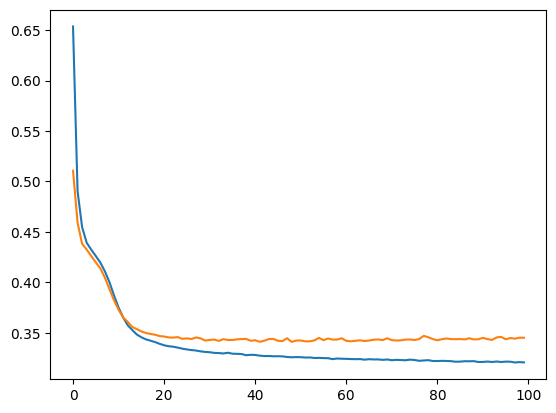

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

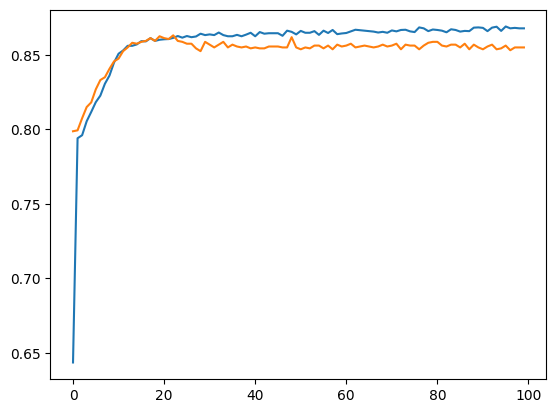

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])